# **Optimization Project**
By Amando Xu and Tanvir Ahmed

# Writeup

### Question 1

\begin{align*}
\text{Minimize:} \quad Z = & \sum_{i=0}^{N} \sum_{k=0}^{N} s_{ik} d_{ik} \sum_{j=0}^{N} f_{ij} \\
& + \sum_{j=0}^{N} \sum_{m=0}^{N} s_{jm} d_{jm} \sum_{i=0}^{N} f_{ij} \\
& + \alpha \sum_{i=0}^{N} \sum_{j=0}^{N} \sum_{k=0}^{N} \sum_{m=0}^{N} z_{ijkm} f_{ij} d_{km} \\
\text{Subject to:} \\
& (N - K + 1) s_{jj} - \sum_{i=0}^{N} s_{ij} \geq 0 \quad \forall j \\
& \sum_{j=0}^{N} s_{ij} = 1 \quad \forall i \\
& \sum_{j=0}^{N} s_{jj} = K \\
& z_{ijkm} \leq s_{ik} \quad \forall i,j,k,m \\
& z_{ijkm} \leq s_{jm} \quad \forall i,j,k,m \\
& z_{ijkm} \geq s_{ik} + s_{jm} - 1 \quad \forall i,j,k,m \\
& z_{ijkm} \geq 0 \quad \forall i,j,k,m \\
& s_{ij} \in \{0,1\} \quad \forall i,j \\
& z_{ijkm} \in \{0,1\} \quad \forall i,j,k,m
\end{align*}

## Question 2

### 1)

Best objective 1.353134014818e+07, best bound 1.353134014818e+07, gap 0.0000%
Optimal hubs: [2, 16]

### 2)

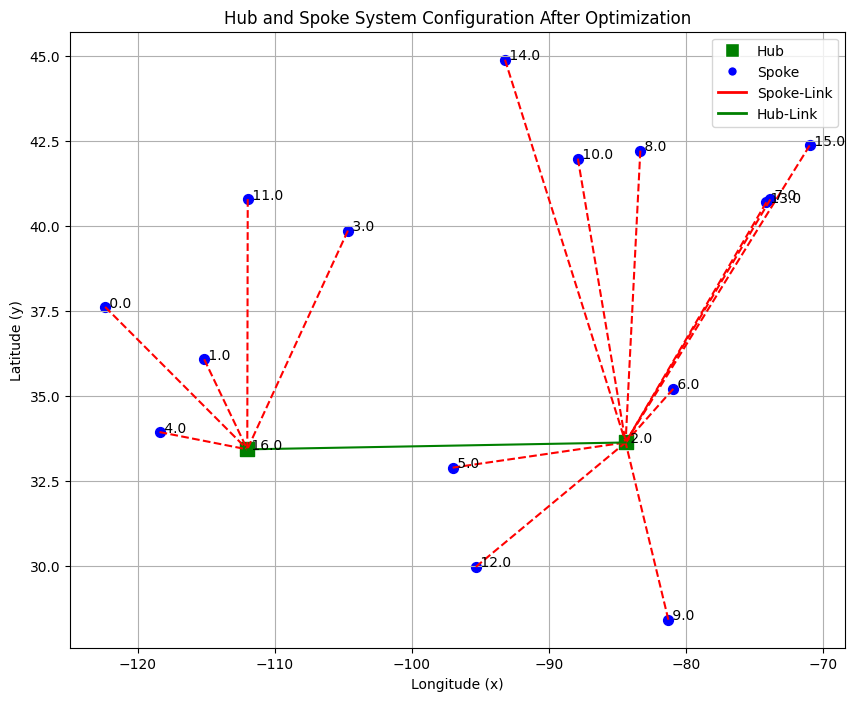

### 3)

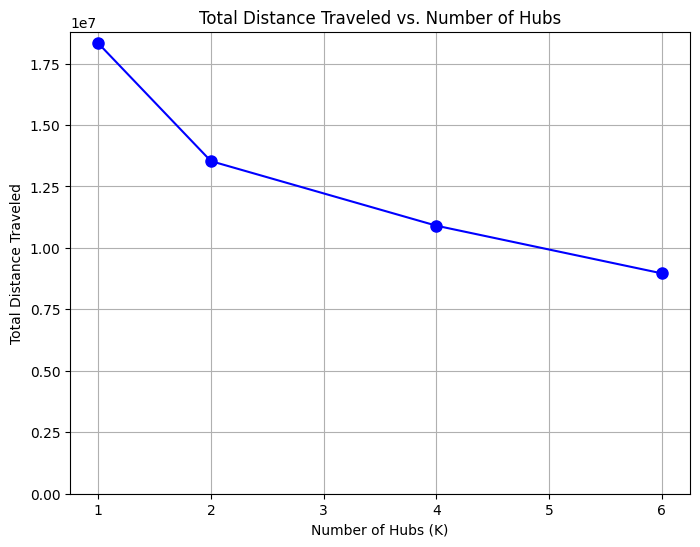

## Question 3

### 1)

Cost at each intermediate hub: \\
K= 1: 505540.0 \\
K= 2: 597250.0 \\
K=4: 647408.0 \\
K=6: 517288.0 \\

### 2)

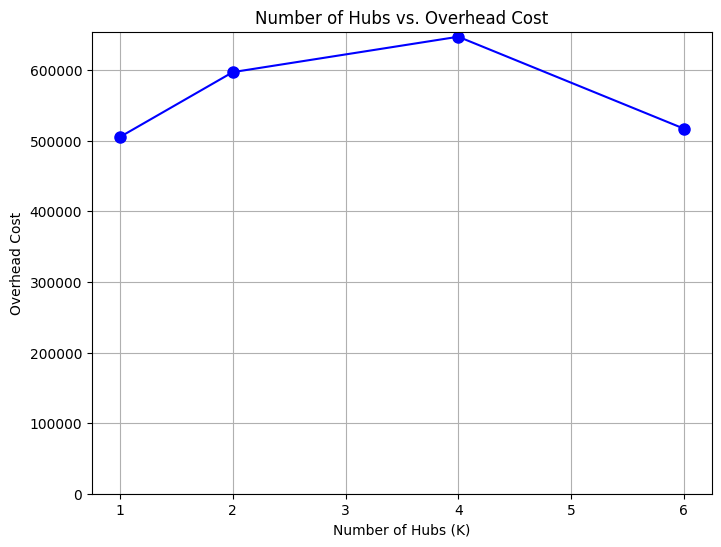

## Question 4

### 1)

The objective is to minimize the total cost, which includes the distance cost multiplied by flow, and an overhead cost for inter-hub flow. The overhead cost is defined as follows:

\begin{equation}
  \text{overheadcost} = c \cdot \text{totalinterhub}
\end{equation}

where \( totalinterhub \) is calculated by:
\begin{equation}
  \text{totalinterhub} = \sum_{(i,j,p) \in A} \left( z_{ijpp} + z_{ijpj} + z_{ijip} \right) \cdot f_{ij} + \sum_{(i,j,p,q) \in B} z_{ijpq} \cdot f_{ij} \cdot 2
\end{equation}

with \( A \) being the set of all 3-permutations of the range \( N \), and \( B \) being the set of all 4-permutations of the range \( N \).

The final objective function then becomes:

\begin{multline}
  \min \sum_{i=1}^{N}\sum_{k=1}^{N} s_{ik} \cdot d_{ik} \cdot \left(\sum_{j=1}^{N} f_{ij}\right) +
  \sum_{j=1}^{N}\sum_{m=1}^{N} s_{jm} \cdot d_{jm} \cdot \left(\sum_{i=1}^{N} f_{ij}\right) \\
  + \alpha \sum_{i=1}^{N}\sum_{j=1}^{N}\sum_{k=1}^{N}\sum_{m=1}^{N} z_{ijkl} \cdot f_{ij} \cdot d_{km} + c \cdot \text{totalinterhub}
\end{multline}

Subject to the following constraints:
\begin{equation}
  (N - K + 1) \cdot s_{jj} - \sum_{i=1}^{N} s_{ij} \geq 0
\end{equation}

\begin{equation}
  \sum_{j=1}^{N} s_{ij} = 1, \quad \forall i
\end{equation}

\begin{equation}
  \sum_{j=1}^{N} s_{jj} = K
\end{equation}

\begin{align}
  z_{ijkl} &\leq s_{ik} \\
  z_{ijkl} &\leq s_{jm} \\
  z_{ijkl} &\geq s_{ik} + s_{jm} - 1 \\
  z_{ijkl} &\geq 0, \quad \forall i, j, k, l
\end{align}


### 2)

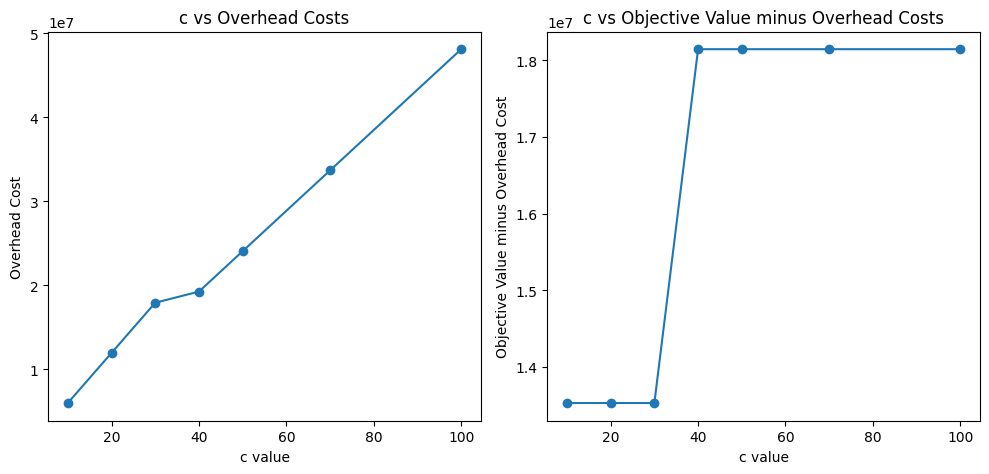

## Question 5

As we consider the operational costs, we see that FreshFarms should still implement a Hub and Spoke model. This is because of various reasons:



1.   Centralizing deliveries to a hub allows for consolidating shipments, which can lead to economies of scale. As we see from alpha of hub to hub transfers as well as the cost of each hub within the route, we see that depending on the alpha that is set as well as the c cost of each package, FreshFarms should benefit from reduced cost of hub to hub transport as long as c does not nullify the alpha discount of hub transport.
2.   FreshFarm can also utilize hub-and-spoke to minimize the time perishable goods spend in transit. By having centralized hubs, FreshFarm can create optimized schedules that ensure fresh produce is moved quickly from the farm to the consumer, reducing spoilage and waste.
3.   With direct routes between every city, the number of routes grows rapidly as the number of cities increases (following a nearly quadratic pattern). A hub-and-spoke system drastically reduces the complexity of the network, as each city only needs a direct connection to the hub, simplifying logistics planning and potentially reducing the risk of errors. This would allow FreshFarms to not do last mile deliveries between every city.



# **Code**

## Setup

In [ ]:
!python -m pip install gurobipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 71.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import scipy.sparse as sp
import pandas as pd
import math
import matplotlib.pyplot as plt

## Project:

Question 1
INSERT OBJECTIVE FUNCTION WRITTEN OUT AND CONSTRAINTS

In [ ]:
cities = np.genfromtxt('/content/drive/MyDrive/Optimization Proj/project/project/cities_small.csv', delimiter=',')

In [ ]:
pack = pd.read_csv('/content/drive/MyDrive/Optimization Proj/project/project/packages_small.csv', delimiter=',')

In [ ]:
cities = np.delete(cities, 0, 0)

In [ ]:
cities

array([[   0.        ,   37.61880556, -122.37541667],
       [   1.        ,   36.08004389, -115.15223472],
       [   2.        ,   33.63669961,  -84.427864  ],
       [   3.        ,   39.86166667, -104.67316667],
       [   4.        ,   33.94249639, -118.40804861],
       [   5.        ,   32.89723306,  -97.03769472],
       [   6.        ,   35.21375   ,  -80.94905556],
       [   7.        ,   40.77725   ,  -73.87261111],
       [   8.        ,   42.21244444,  -83.35338889],
       [   9.        ,   28.42938889,  -81.309     ],
       [  10.        ,   41.97694028,  -87.90814972],
       [  11.        ,   40.78839333, -111.97777333],
       [  12.        ,   29.98443528,  -95.3414425 ],
       [  13.        ,   40.69247983,  -74.16868678],
       [  14.        ,   44.88197222,  -93.22177778],
       [  15.        ,   42.36294444,  -71.00638889],
       [  16.        ,   33.43427778, -112.01158333]])

In [ ]:
# Create matrix of distances
d = np.zeros((len(cities), len(cities)))
for i in range(len(cities)):
  for j in range(len(cities)):
    d[i][j] = math.sqrt((cities[i][1]-cities[j][1])**2 + (cities[i][2]-cities[j][2])**2)

In [ ]:
# Create matrix of flow
f = np.zeros((len(cities), len(cities)))
packnp = pack.to_numpy()
for i in range(len(pack)):
  f[packnp[i][0]][packnp[i][1]] = packnp[i][2]

In [ ]:
alpha = 0.75
K = 2
N = len(cities)

In [ ]:
# Create an environment with your WLS license
params = {
"WLSACCESSID": 'b86ae515-8d1b-456c-be8b-5ed8eb169598',
"WLSSECRET": '787a15a8-c2e3-4832-937a-b09554704cdd',
"LICENSEID": 2434447,
}
env = gp.Env(params=params)

# Create the model within the Gurobi environment
m = gp.Model(env=env)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2434447
Academic license - for non-commercial use only - registered to ta373@cornell.edu


In [ ]:
def op_model(N, d, f, K):
  # Assuming N, d, f, K, and alpha are already defined

  model = gp.Model(env=env)

  # Decision Variables
  s = {}
  for i in range(N):
      for j in range(N):
          s[i, j] = model.addVar(vtype=GRB.BINARY, name=f"s_{i}_{j}")

  z = {}
  for i in range(N):
      for j in range(N):
          for k in range(N):
              for m in range(N):
                  z[i, j, k, m] = model.addVar(vtype=GRB.BINARY, name=f"z_{i}_{j}_{k}_{m}")

  # Objective
  model.setObjective(
      sum(s[i, k] * d[i, k] * sum(f[i, j] for j in range(N)) for i in range(N) for k in range(N)) +
      sum(s[j, m] * d[j, m] * sum(f[i, j] for i in range(N)) for j in range(N) for m in range(N)) +
      alpha * sum(z[i, j, k, m] * f[i, j] * d[k, m] for i in range(N) for j in range(N) for k in range(N) for m in range(N)),
      GRB.MINIMIZE
  )

  # Constraints for s
  for j in range(N):
      model.addConstr((N - K + 1) * s[j, j] - sum(s[i, j] for i in range(N)) >= 0)

  for i in range(N):
      model.addConstr(sum(s[i, j] for j in range(N)) == 1)

  model.addConstr(sum(s[j, j] for j in range(N)) == K)

  # Constraints to linearize the product s_i_k * s_j_m
  for i in range(N):
      for j in range(N):
          for k in range(N):
              for m in range(N):
                  model.addConstr(z[i, j, k, m] <= s[i, k])
                  model.addConstr(z[i, j, k, m] <= s[j, m])
                  model.addConstr(z[i, j, k, m] >= s[i, k] + s[j, m] - 1)
                  model.addConstr(z[i, j, k, m] >= 0)

  # Solve the model
  model.optimize()

  # Retrieve the results
  if model.status == GRB.OPTIMAL:
          hubs = [j for j in range(N) if s[j, j].X > 0.5]
          print(f"Optimal hubs: {hubs}")

          # Create a dictionary of spokes and their associated hubs
          spokes_to_hubs = {i: j for i in range(N) for j in hubs if s[i, j].X > 0.5 } #and i != j
          return hubs, spokes_to_hubs, model.objval
  else:
      print("No solution found")

In [ ]:
%time
hubs2, spokes_to_hubs2, obj2 = op_model(N, d, f, 2)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license - for non-commercial use only - registered to ta373@cornell.edu
Optimize a model with 334119 rows, 83810 columns and 668474 nonzeros
Model fingerprint: 0x6e01b3da
Variable types: 0 continuous, 83810 integer (83810 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 4e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 98260 rows and 4913 columns (presolve time = 5s) ...
Presolve removed 297908 rows and 47617 columns
Presolve time: 6.46s
Presolved: 36211 rows, 36193 columns, 108851 nonzeros
Variable types: 0 continuous, 36193 integer (36193 binary)
Found heuristic solution: objective 1.694557e+07

Root simplex log...

Ite

In [ ]:
spokes_to_hubs2

{0: 16,
 1: 16,
 2: 2,
 3: 16,
 4: 16,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 16,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 16}

## Question 2

1

In [ ]:
def cart_plot(hubs, spokes_to_hubs):

  # Extract longitudes (x) and latitudes (y) of cities for easier plotting
  lons = cities[:, 2]
  lats = cities[:, 1]

  # Initialize the plot
  fig, ax = plt.subplots(figsize=(10, 8))
  ax.set_title("Hub and Spoke System Configuration After Optimization")
  ax.set_xlabel("Longitude (x)")
  ax.set_ylabel("Latitude (y)")

  # Plot hubs, spokes, and the links between them
  for i in range(len(cities)):
      if i in hubs:
          ax.scatter(lons[i], lats[i], c='g', marker='s', s=100, label=f'Hub {i}')  # Hub
      else:
          ax.scatter(lons[i], lats[i], c='b', s=50, label=f'Spoke {i}')  # Spoke
          hub = spokes_to_hubs[i]
          ax.plot([lons[i], lons[hub]], [lats[i], lats[hub]], 'r--')

  # Connect the hubs with lines
  for i in range(len(hubs)):
      for j in range(i+1, len(hubs)):
          ax.plot([lons[hubs[i]], lons[hubs[j]]], [lats[hubs[i]], lats[hubs[j]]], 'g-')

  # Optionally, to avoid repeating labels in the legend, you can create custom legend elements
  from matplotlib.lines import Line2D
  legend_elements = [Line2D([0], [0], marker='s', color='g', label='Hub', markersize=10, linestyle='None'),
                    Line2D([0], [0], marker='o', color='b', label='Spoke', markersize=7, linestyle='None'),
                    Line2D([0], [0], color='r', lw=2, label='Spoke-Link'),
                    Line2D([0], [0], color='g', lw=2, label='Hub-Link')]
  ax.legend(handles=legend_elements, loc="upper right")

  plt.grid(True)
  plt.show()

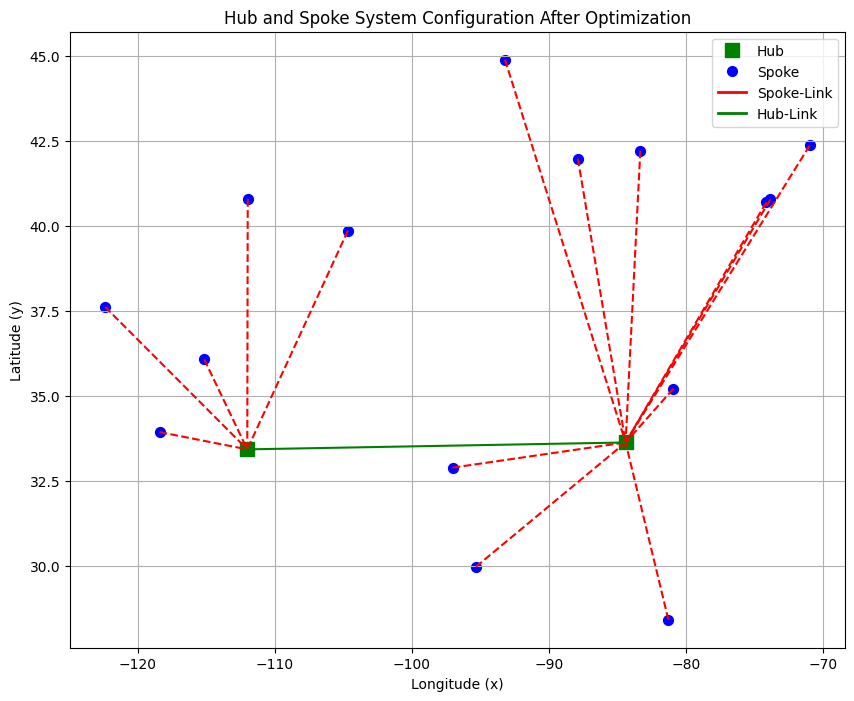

In [ ]:
cart_plot(hubs2, spokes_to_hubs2)

In [ ]:
hubs1, spokes_to_hubs1, obj1 = op_model(N, d, f, 1)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license - for non-commercial use only - registered to ta373@cornell.edu
Optimize a model with 334119 rows, 83810 columns and 668474 nonzeros
Model fingerprint: 0x81ec099b
Variable types: 0 continuous, 83810 integer (83810 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 4e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 99076 rows and 5185 columns (presolve time = 5s) ...
Presolve removed 333982 rows and 83657 columns
Presolve time: 6.62s
Presolved: 137 rows, 153 columns, 425 nonzeros
Variable types: 0 continuous, 153 integer (153 binary)
Found heuristic solution: objective 1.832757e+07

Explored 0 nodes (0 simplex iterations) in 6.77 seconds (4.34 work units)
Thread count was 2 (of 2 

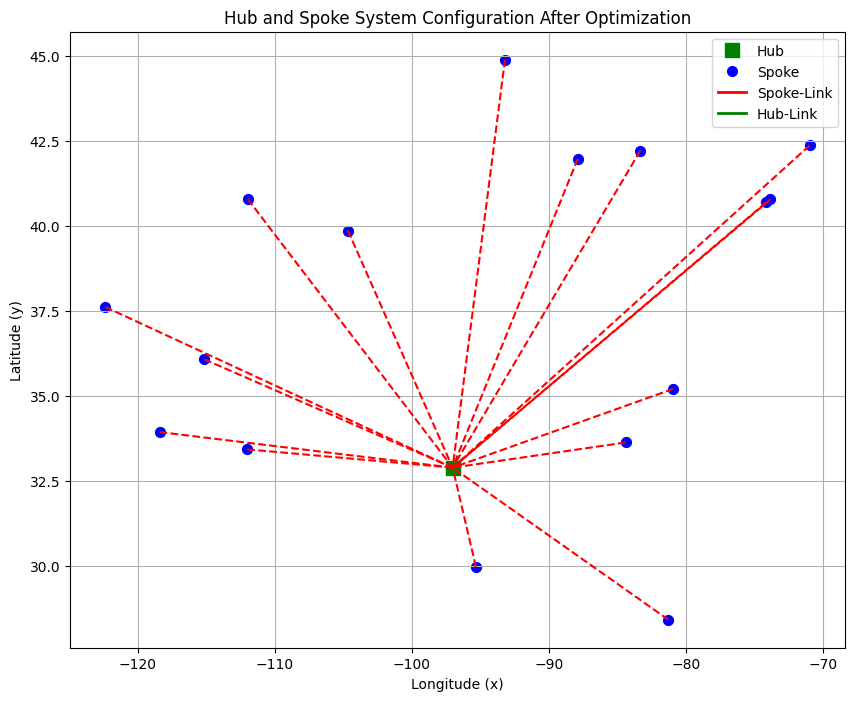

In [ ]:
cart_plot(hubs1, spokes_to_hubs1)

In [ ]:
hubs3, spokes_to_hubs3, obj3 = op_model(N, d, f, 3)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license - for non-commercial use only - registered to ta373@cornell.edu
Optimize a model with 334119 rows, 83810 columns and 668474 nonzeros
Model fingerprint: 0xe3b50c8d
Variable types: 0 continuous, 83810 integer (83810 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e-01, 4e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve removed 98260 rows and 4913 columns (presolve time = 5s) ...
Presolve removed 297908 rows and 47617 columns
Presolve time: 7.05s
Presolved: 36211 rows, 36193 columns, 108851 nonzeros
Variable types: 0 continuous, 36193 integer (36193 binary)
Found heuristic solution: objective 1.656295e+07

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   

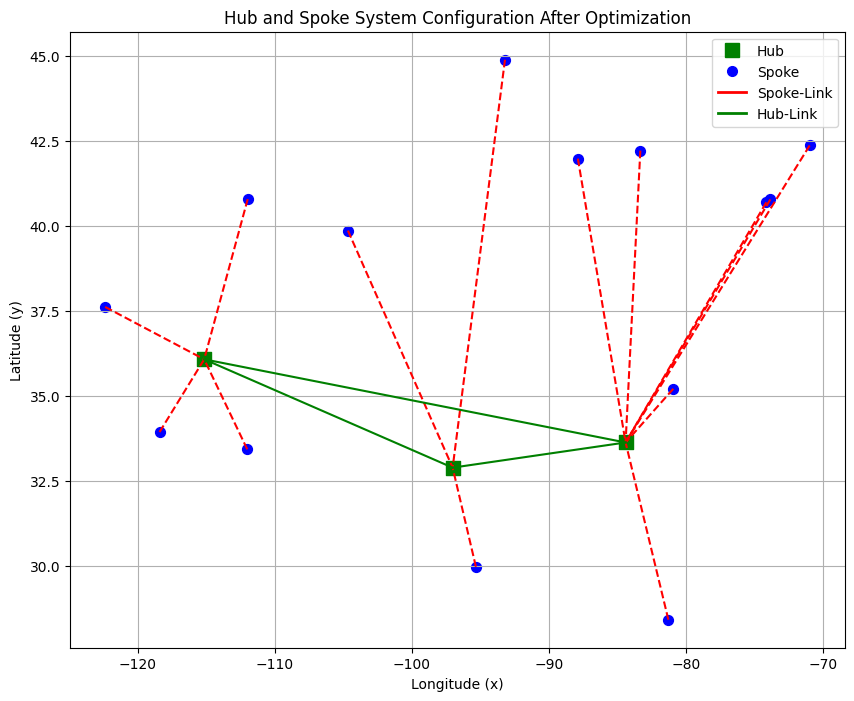

In [ ]:
cart_plot(hubs3, spokes_to_hubs3)

In [ ]:
hubs4, spokes_to_hubs4, obj4 = op_model(N, d, f, 4)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license - for non-commercial use only - registered to ta373@cornell.edu
Optimize a model with 334119 rows, 83810 columns and 668474 nonzeros
Model fingerprint: 0xd69cfdff
Variable types: 0 continuous, 83810 integer (83810 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e-01, 4e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Presolve removed 98260 rows and 4913 columns (presolve time = 5s) ...
Presolve removed 297908 rows and 47617 columns
Presolve time: 7.03s
Presolved: 36211 rows, 36193 columns, 108851 nonzeros
Variable types: 0 continuous, 36193 integer (36193 binary)
Found heuristic solution: objective 1.644297e+07

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   

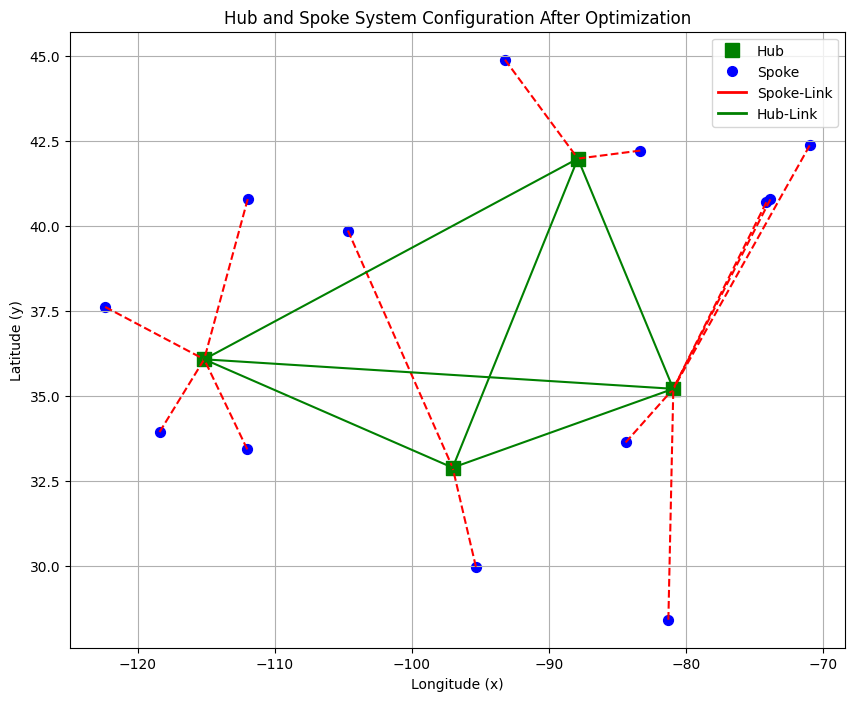

In [ ]:
cart_plot(hubs4, spokes_to_hubs4)

In [ ]:
hubs6, spokes_to_hubs6, obj6 = op_model(N, d, f, 6)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license - for non-commercial use only - registered to ta373@cornell.edu
Optimize a model with 334119 rows, 83810 columns and 668474 nonzeros
Model fingerprint: 0xe0f43319
Variable types: 0 continuous, 83810 integer (83810 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e-01, 4e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 98260 rows and 4913 columns (presolve time = 5s) ...
Presolve removed 297908 rows and 47617 columns
Presolve time: 6.40s
Presolved: 36211 rows, 36193 columns, 108851 nonzeros
Variable types: 0 continuous, 36193 integer (36193 binary)
Found heuristic solution: objective 1.444967e+07

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   

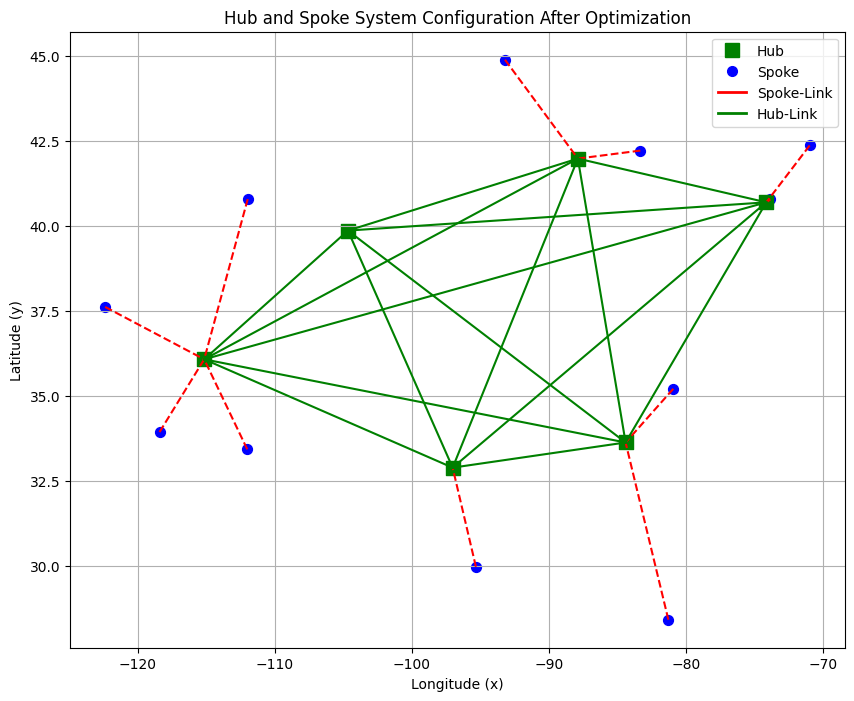

In [ ]:
cart_plot(hubs6, spokes_to_hubs6)

In [ ]:
K_values = [1, 2, 4, 6]
total_distances = [obj1, obj2, obj4, obj6]

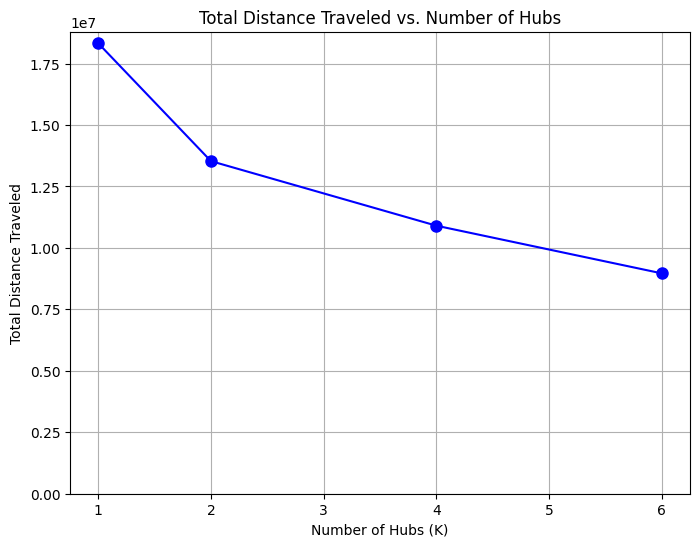

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(K_values, c_vals, '-o', color='b', markersize=8)
plt.xlabel("Number of Hubs (K)")
plt.ylabel("Overhead Cost")
plt.title("Number of Hubs vs. Overhead Cost")
plt.grid(True)
plt.ylim(bottom = 0)
plt.show()

## Question 3

In [ ]:
def intermediate_count(hubs, spokes_to_hubs):
  c_count = 0
  for i in range(N):
    for j in range(N):
      if i in hubs and j not in hubs and spokes_to_hubs.get(j)!= i:
        c_count += f[i][j]
      if j in hubs and i not in hubs and spokes_to_hubs.get(i)!= j:
        c_count += f[i][j]
      if i not in hubs and j not in hubs:
        if spokes_to_hubs.get(j) == spokes_to_hubs.get(i):
          c_count += f[i][j]
        else:
          c_count += 2 * f[i][j]
  return c_count

In [ ]:
c1 = intermediate_count(hubs1, spokes_to_hubs1)
c1

505540.0

In [ ]:
c2 = intermediate_count(hubs2, spokes_to_hubs2)
c2

597250.0

In [ ]:
c4 = intermediate_count(hubs4, spokes_to_hubs4)
c4

647408.0

In [ ]:
c6 = intermediate_count(hubs6, spokes_to_hubs6)
c6

517288.0

In [ ]:
K_values = [1, 2, 4, 6]
c_vals = [c1, c2, c4, c6]

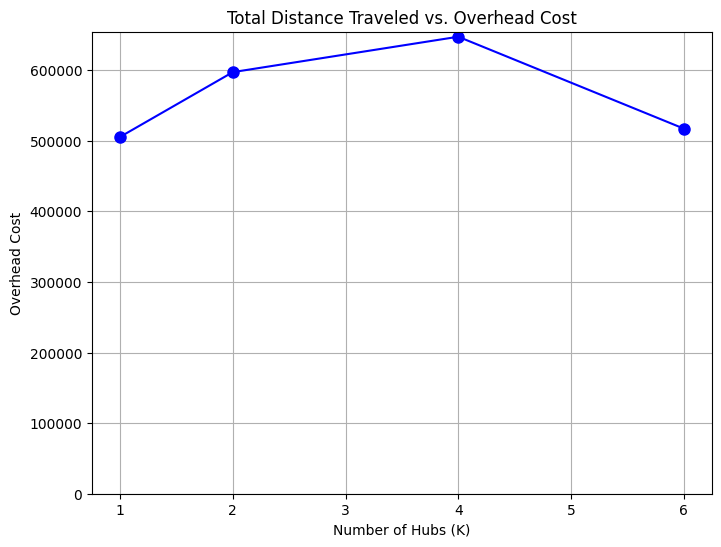

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(K_values, c_vals, '-o', color='b', markersize=8)
plt.xlabel("Number of Hubs (K)")
plt.ylabel("Overhead Cost")
plt.title("Total Distance Traveled vs. Overhead Cost")
plt.grid(True)
plt.ylim(bottom = 0)
plt.show()

## Question 4

Updating the code to compute

In [ ]:
from itertools import permutations
def op_model2(N, d, f, K, c):

  model = gp.Model(env=env)

  # Decision Variables
  s = {}
  for i in range(N):
      for j in range(N):
          s[i, j] = model.addVar(vtype=GRB.BINARY, name=f"s_{i}_{j}")

  z = {}
  for i in range(N):
      for j in range(N):
          for k in range(N):
              for m in range(N):
                  z[i, j, k, m] = model.addVar(vtype=GRB.BINARY, name=f"z_{i}{j}{k}_{m}")

  A = list(permutations(range(N), 3))
  B = list(permutations(range(N), 4))
  totalinterhub = 0
  for i,j,p in A:
      totalinterhub += z[i, j, p, p]*f[i,j]
      totalinterhub += z[i,j,p,j]*f[i,j]
      totalinterhub += z[i,j,i,p]*f[i,j]

  for i,j,p,q in B:
      totalinterhub += z[i, j, p, q] * f[i,j] * 2

  overheadcost = c*totalinterhub

  # Objective
  model.setObjective(
      sum(s[i, k] * d[i, k] * sum(f[i, j] for j in range(N)) for i in range(N) for k in range(N)) +
      sum(s[j, m] * d[j, m] * sum(f[i, j] for i in range(N)) for j in range(N) for m in range(N)) +
      alpha * sum(z[i, j, k, m] * f[i, j] * d[k, m] for i in range(N) for j in range(N) for k in range(N) for m in range(N))
      + overheadcost,
      GRB.MINIMIZE
  )

  # Constraints for s
  for j in range(N):
      model.addConstr((N - K + 1) * s[j, j] - sum(s[i, j] for i in range(N)) >= 0)

  for i in range(N):
      model.addConstr(sum(s[i, j] for j in range(N)) == 1)

  model.addConstr(sum(s[j, j] for j in range(N)) == K)

  # Constraints to linearize the product s_i_k * s_j_m
  for i in range(N):
      for j in range(N):
          for k in range(N):
              for m in range(N):
                  model.addConstr(z[i, j, k, m] <= s[i, k])
                  model.addConstr(z[i, j, k, m] <= s[j, m])
                  model.addConstr(z[i, j, k, m] >= s[i, k] + s[j, m] - 1)
                  model.addConstr(z[i, j, k, m] >= 0)

  model.optimize()

  if model.status == GRB.OPTIMAL:
          hubs = [j for j in range(N) if s[j, j].X > 0.5]
          print(f"Optimal hubs: {hubs}")

          spokes_to_hubs = {i: j for i in range(N) for j in hubs if s[i, j].X > 0.5 } #and i != j
          actual_overheadcost = overheadcost.getValue()

          return hubs, spokes_to_hubs, model.objval, actual_overheadcost
  else:
      print("No solution found")

In [ ]:
c_values = [10, 20, 30, 40, 50, 70, 100]
overhead_costs = []
objvals = []

for c in c_values:
    hubs, spokes_to_hubs, objval, overheadcost= op_model2(N, d, f, K, c)

    overhead_costs.append(overheadcost)

    objvals.append(objval)


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license - for non-commercial use only - registered to ta373@cornell.edu
Optimize a model with 334119 rows, 83810 columns and 668474 nonzeros
Model fingerprint: 0x9d9176d7
Variable types: 0 continuous, 83810 integer (83810 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-01, 4e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 98260 rows and 4913 columns (presolve time = 5s) ...
Presolve removed 295928 rows and 45637 columns
Presolve time: 6.96s
Presolved: 38191 rows, 38173 columns, 114791 nonzeros
Variable types: 0 continuous, 38173 integer (38173 binary)
Found heuristic solution: objective 2.353487e+07

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   

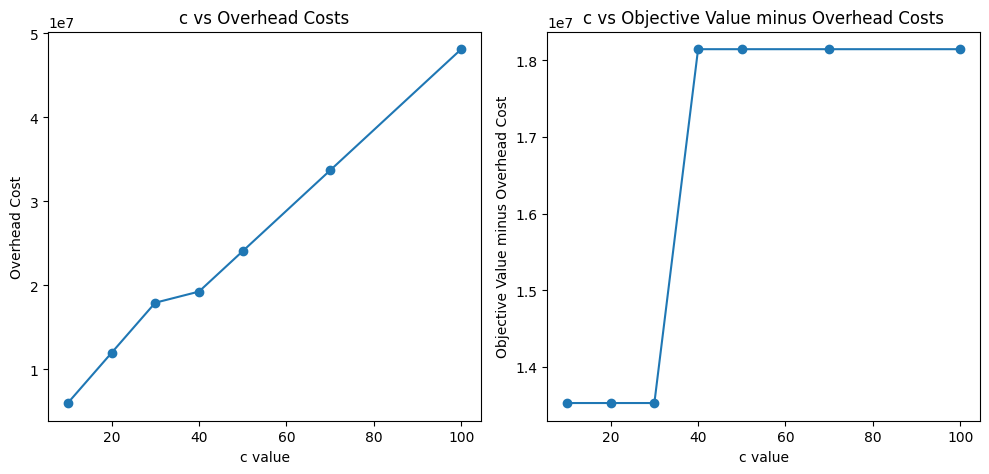

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# Plot c vs overhead costs
plt.subplot(1, 2, 1)
plt.plot(c_values, overhead_costs, marker='o')
plt.title('c vs Overhead Costs')
plt.xlabel('c value')
plt.ylabel('Overhead Cost')

# Plot c vs (objval - overhead costs)
plt.subplot(1, 2, 2)
plt.plot(c_values, [ov - oc for ov, oc in zip(objvals, overhead_costs)], marker='o')
plt.title('c vs Objective Value minus Overhead Costs')
plt.xlabel('c value')
plt.ylabel('Objective Value minus Overhead Cost')

plt.tight_layout()
plt.show()


ChatGPT was utilized in the creation of this project